<a href="https://colab.research.google.com/github/himanithakar1002/autoencoding/blob/main/autoencoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **20MCS0029 | Auto Encoding**

In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

11493376/11490434 [==============================] - 0s 0us/step


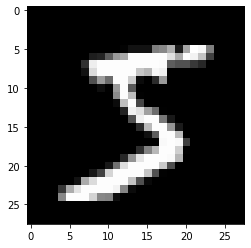

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

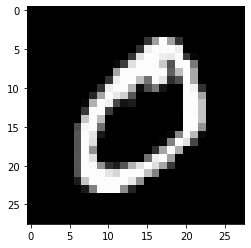

In [3]:
plt.imshow(x_train[1], cmap="gray")

In [4]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
x_train[0].shape

(28, 28)

In [6]:
28*28

784

In [7]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')

In [8]:
x = keras.layers.Flatten()(encoder_input)

In [9]:
encoder_output = keras.layers.Dense(64, activation="relu")(x)

In [10]:
64/784

0.08163265306122448

In [11]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [12]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)

In [13]:
x = keras.layers.Dense(784, activation="relu")(decoder_input)

In [14]:
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [15]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

In [16]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [17]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [18]:
autoencoder.compile(opt, loss='mse')

In [28]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 4s 2ms/step - loss: 0.0122 - val_loss: 0.0120
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0120 - val_loss: 0.0120
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0118 - val_loss: 0.0118
INFO:tensorflow:Assets written to: models/AE-3.model/assets


In [31]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])


(64,)
[0.         1.9999847  0.         0.0797016  1.6846668  1.9463828
 0.0079964  1.000462   1.9154823  0.8278828  0.56816024 1.6827888
 2.3356397  1.6158013  0.66757643 1.4901958  0.6411724  1.5011252
 1.2707351  2.1951113  1.3274943  1.2400895  1.1785651  1.1315053
 0.5836735  0.13965318 0.15132383 1.6438326  1.4966742  0.8928547
 0.58147156 0.58943915 0.         0.9740286  0.9212366  1.7281464
 0.         0.68834645 2.1062317  1.4902312  1.3151255  0.6742391
 2.394624   1.524814   2.1262271  0.8726383  0.31332278 0.
 0.5727004  0.96459675 2.6461356  1.1003476  2.4257274  0.
 0.44508454 0.         1.6352452  1.2326102  1.4773468  0.80886024
 1.0992405  1.5179232  2.4995928  0.9689461 ]


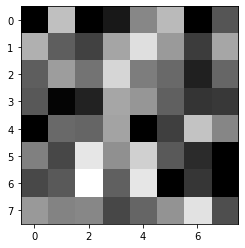

In [29]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

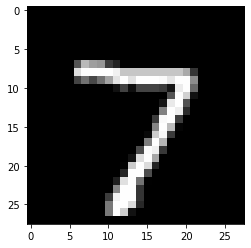

In [22]:
plt.imshow(x_test[0], cmap="gray")

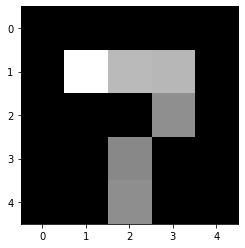

In [33]:
smaller = cv2.resize(x_test[0], (5,5))
back_to_original = cv2.resize(smaller, (28,28))
plt.imshow(smaller, cmap="gray")

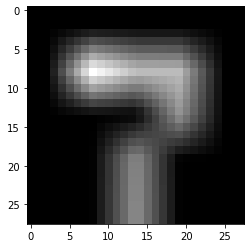

In [34]:
plt.imshow(back_to_original, cmap="gray")

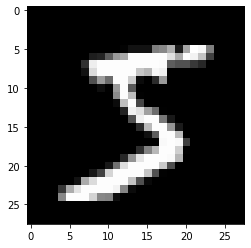

In [35]:
plt.imshow(x_train[0], cmap="gray")

In [37]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

In [38]:
noisy = add_noise(x_train[0])

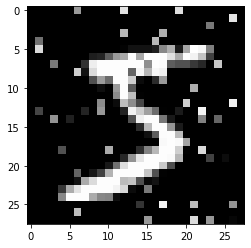

In [39]:
plt.imshow(noisy, cmap="gray")

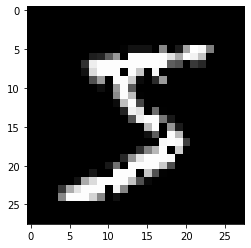

In [41]:
def remove_values(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = 0  # changing this to be 0 
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

some_hidden = remove_values(x_train[0], random_chance=15)  # slightly higher chance so we see more impact
plt.imshow(some_hidden, cmap="gray")

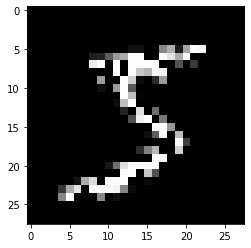

In [42]:
some_hidden = remove_values(x_train[0], random_chance=35)  # slightly higher chance so we see more impact
plt.imshow(some_hidden, cmap="gray")